# 1. SETTINGS

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pip install method (recommended)

!pip install --upgrade pip
!pip install torch torchvision torchaudio
!pip install roboflow
!pip install ultralytics

# clear installation output from  !pip
from IPython import display
display.clear_output()

# check package y hardware
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

# 2. DATASET

Create the [dataset](https://docs.ultralytics.com/datasets/detect/) directory (if it doesn't exist), where we are going to save the dataset with which we are going to train yolov8.

In [ ]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


In [ ]:
# Cambiar al directorio creado
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())

# importar dataset (snipet roboflow)
from roboflow import Roboflow
rf = Roboflow(api_key="5xvhWbT7GJjHZvn6ukFk")
project = rf.workspace("tfg-2nmge").project("yolo-yejbs")
version = project.version(1)
dataset = version.download("yolov8")


dataset_dir = /content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chest-xray-images-3 in folder:: 100%|██████████| 9908/9908 [00:01<00:00, 5399.07it/s]


## Displaying some samples from the Dataset


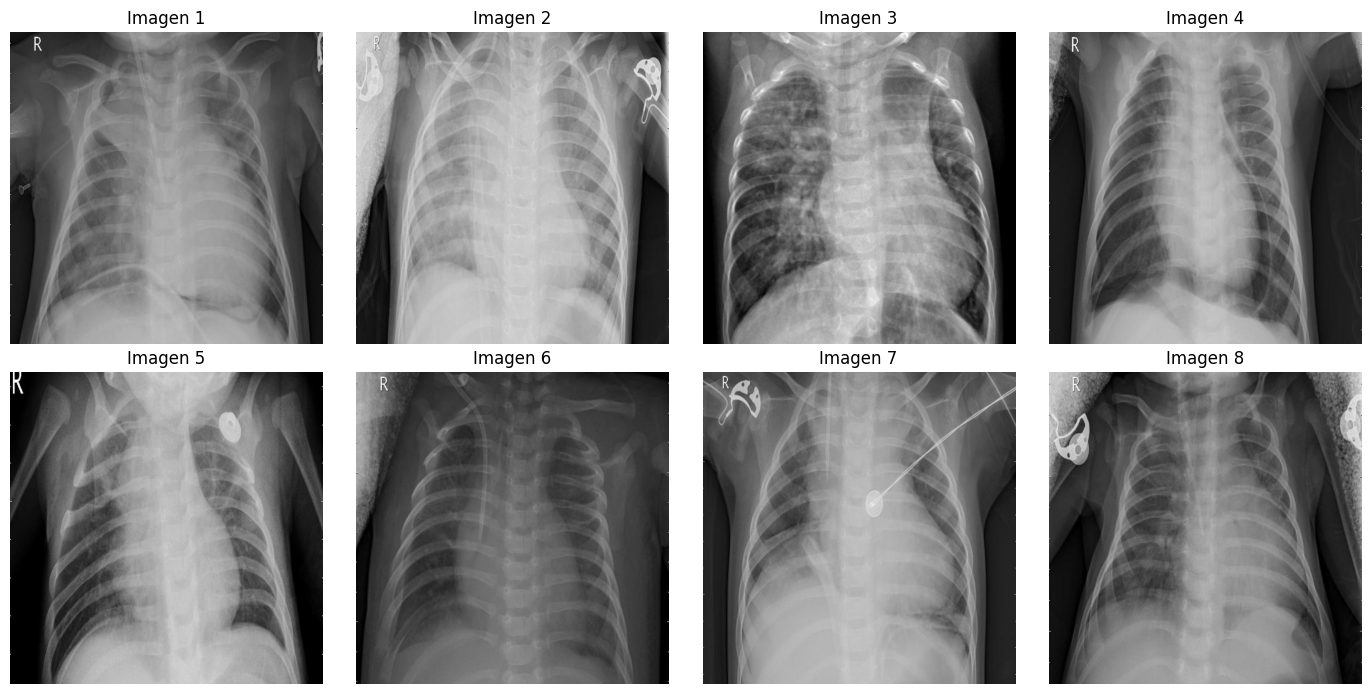

In [ ]:
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{dataset.location}/test/bacteria/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()